In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

# Generate synthetic financial dataset
np.random.seed(42)
n = 200

df = pd.DataFrame({
    'customer_id': range(1, n+1),
    'income': np.random.normal(60000, 15000, n).astype(int),
    'credit_score': np.random.normal(680, 50, n).astype(int),
    'monthly_spend': np.random.normal(2000, 600, n).astype(int),
    'region': np.random.choice(['North','South','East','West'], n),
    'default_flag': np.random.choice([0,1], n, p=[0.8,0.2])
})
df.head()

,customer_id,income,credit_score,monthly_spend,region,default_flag
0,1,67450,697,1043,East,0
1,2,57926,708,1640,West,0
2,3,69715,734,2003,West,0
3,4,82845,732,2028,North,0
4,5,56487,611,1729,South,0


## Implement at least 2 new features

### Basic Transformations

In [2]:
# Percent change in monthly spending
df['spend_pct_change'] = df['monthly_spend'].pct_change().fillna(0)

# Rolling mean of spending (3-month window)
df['rolling_spend_mean'] = df['monthly_spend'].rolling(3).mean().fillna(df['monthly_spend'])

# Binary flag for high spenders
df['high_spender_flag'] = (df['monthly_spend'] > 2500).astype(int)
df.head()

,customer_id,income,credit_score,monthly_spend,region,default_flag,spend_pct_change,rolling_spend_mean,high_spender_flag
0,1,67450,697,1043,East,0,0.000000,1043.000000,0
1,2,57926,708,1640,West,0,0.572387,1640.000000,0
2,3,69715,734,2003,West,0,0.221341,1562.000000,0
3,4,82845,732,2028,North,0,0.012481,1890.333333,0
4,5,56487,611,1729,South,0,-0.147436,1920.000000,0


### rationales
- **spend_pct_change**  
  Percentage change in monthly spending compared to the previous period.  
  → Captures short-term dynamics and volatility in spending behavior.  

- **rolling_spend_mean**  
  3-month rolling average of monthly spending.  
  → Smooths out short-term fluctuations and highlights overall spending trends.  

### Categorical Encoding

In [3]:
df.head(3)

,customer_id,income,credit_score,monthly_spend,region,default_flag,spend_pct_change,rolling_spend_mean,high_spender_flag
0,1,67450,697,1043,East,0,0.000000,1043.0,0
1,2,57926,708,1640,West,0,0.572387,1640.0,0
2,3,69715,734,2003,West,0,0.221341,1562.0,0


In [4]:
# One-hot encoding
df_onehot = pd.get_dummies(df, columns=['region'])
df_onehot 

,customer_id,income,credit_score,monthly_spend,default_flag,spend_pct_change,rolling_spend_mean,high_spender_flag,region_East,region_North,region_South,region_West
0,1,67450,697,1043,0,0.000000,1043.000000,0,True,False,False,False
1,2,57926,708,1640,0,0.572387,1640.000000,0,False,False,False,True
2,3,69715,734,2003,0,0.221341,1562.000000,0,False,False,False,True
3,4,82845,732,2028,0,0.012481,1890.333333,0,False,True,False,False
4,5,56487,611,1729,0,-0.147436,1920.000000,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,65779,656,1693,0,-0.354310,2171.666667,0,False,True,False,False
196,197,46742,594,1838,0,0.085647,2051.000000,0,True,False,False,False
197,198,62305,747,1412,0,-0.231774,1647.666667,0,True,False,False,False
198,199,60873,674,1733,1,0.227337,1661.000000,0,False,False,False,True


In [5]:
# Label encoding
le = LabelEncoder()
df['region_label'] = le.fit_transform(df['region'])
df

,customer_id,income,credit_score,monthly_spend,region,default_flag,spend_pct_change,rolling_spend_mean,high_spender_flag,region_label
0,1,67450,697,1043,East,0,0.000000,1043.000000,0,0
1,2,57926,708,1640,West,0,0.572387,1640.000000,0,3
2,3,69715,734,2003,West,0,0.221341,1562.000000,0,3
3,4,82845,732,2028,North,0,0.012481,1890.333333,0,1
4,5,56487,611,1729,South,0,-0.147436,1920.000000,0,2
...,...,...,...,...,...,...,...,...,...,...
195,196,65779,656,1693,North,0,-0.354310,2171.666667,0,1
196,197,46742,594,1838,East,0,0.085647,2051.000000,0,0
197,198,62305,747,1412,East,0,-0.231774,1647.666667,0,0
198,199,60873,674,1733,West,1,0.227337,1661.000000,0,3


In [6]:
# Frequency encoding
region_freq = df['region'].value_counts(normalize=True)
df['region_freq'] = df['region'].map(region_freq)
df[['region','region_label','region_freq']].head()

,region,region_label,region_freq
0,East,0,0.275
1,West,3,0.230
2,West,3,0.230
3,North,1,0.240
4,South,2,0.255


### Interaction & Polynomial Features

In [7]:
# Interaction feature
df['income_x_credit'] = df['income'] * df['credit_score']

# Squared feature
df['income_squared'] = df['income'] ** 2

# Polynomial features using sklearn
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['income','credit_score']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['income','credit_score']))
df = pd.concat([df, poly_df], axis=1)
df.head()

,customer_id,income,credit_score,monthly_spend,region,default_flag,spend_pct_change,rolling_spend_mean,high_spender_flag,region_label,region_freq,income_x_credit,income_squared,income,credit_score,income^2,income credit_score,credit_score^2
0,1,67450,697,1043,East,0,0.000000,1043.000000,0,0,0.275,47012650,4549502500,67450.0,697.0,4.549502e+09,47012650.0,485809.0
1,2,57926,708,1640,West,0,0.572387,1640.000000,0,3,0.230,41011608,3355421476,57926.0,708.0,3.355421e+09,41011608.0,501264.0
2,3,69715,734,2003,West,0,0.221341,1562.000000,0,3,0.230,51170810,4860181225,69715.0,734.0,4.860181e+09,51170810.0,538756.0
3,4,82845,732,2028,North,0,0.012481,1890.333333,0,1,0.240,60642540,6863294025,82845.0,732.0,6.863294e+09,60642540.0,535824.0
4,5,56487,611,1729,South,0,-0.147436,1920.000000,0,2,0.255,34513557,3190781169,56487.0,611.0,3.190781e+09,34513557.0,373321.0


## (Optional) Plot or test correlation with target variable

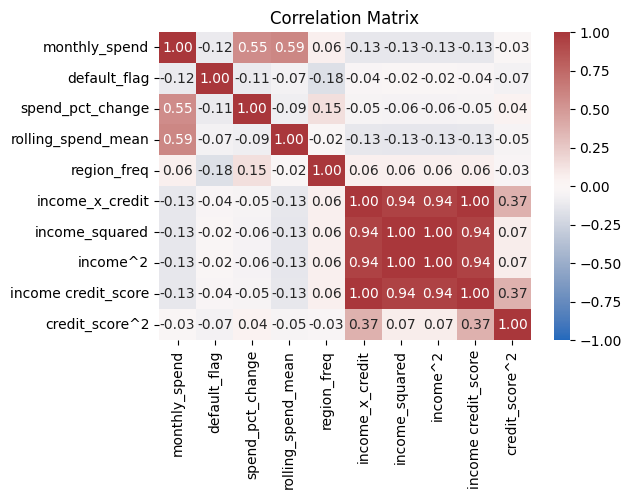

,monthly_spend,default_flag,spend_pct_change,rolling_spend_mean,region_freq,income_x_credit,income_squared,income^2,income credit_score,credit_score^2
monthly_spend,1.000000,-0.115674,0.554805,0.587527,0.057195,-0.127378,-0.129173,-0.129173,-0.127378,-0.028756
default_flag,-0.115674,1.000000,-0.111003,-0.068782,-0.179666,-0.037999,-0.021050,-0.021050,-0.037999,-0.070200
spend_pct_change,0.554805,-0.111003,1.000000,-0.090525,0.147645,-0.048861,-0.057174,-0.057174,-0.048861,0.040290
rolling_spend_mean,0.587527,-0.068782,-0.090525,1.000000,-0.022141,-0.128398,-0.134749,-0.134749,-0.128398,-0.051391
region_freq,0.057195,-0.179666,0.147645,-0.022141,1.000000,0.056811,0.061742,0.061742,0.056811,-0.032536
income_x_credit,-0.127378,-0.037999,-0.048861,-0.128398,0.056811,1.000000,0.939470,0.939470,1.000000,0.372150
income_squared,-0.129173,-0.021050,-0.057174,-0.134749,0.061742,0.939470,1.000000,1.000000,0.939470,0.072094
income^2,-0.129173,-0.021050,-0.057174,-0.134749,0.061742,0.939470,1.000000,1.000000,0.939470,0.072094
income credit_score,-0.127378,-0.037999,-0.048861,-0.128398,0.056811,1.000000,0.939470,0.939470,1.000000,0.372150
credit_score^2,-0.028756,-0.070200,0.040290,-0.051391,-0.032536,0.372150,0.072094,0.072094,0.372150,1.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df[['monthly_spend','region','default_flag','spend_pct_change','rolling_spend_mean','region_freq','income_x_credit','income_squared','income^2','income credit_score','credit_score^2']].corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr